In [2]:
import inspect 
import os
import random
import sys

def extract_log(log_file, new_log_file, key_word):
    with open (log_file, 'r') as f:
        with open(new_log_file, 'w') as train_log:
            for line in f:
                # 去除多GPU的同步log
                if 'Syncing' in line:
                    continue
                if 'nan' in line:
                    continue
                if key_word in line:
                    train_log.write(line)
        f.close()
        train_log.close()



In [4]:

extract_log('E:\\Downloads\\paper_weed_detection\\images\\sugarbeet-bindweed-trainlog.txt','train_log_loss.txt','images')
# extract_log('train_yolov3.log','train_log_iou.txt','IOU')


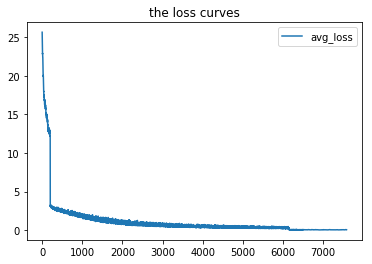

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
lines = 64000
result = pd.read_csv('train_log_loss.txt', skiprows=[x for x in range(201,lines) if ((x%10!=9)|(x<1000))], error_bad_lines=False,\
                    names = ['loss','avg','rate','seconds','images'])
result.head()

result['loss'] = result['loss'].str.split(' ').str.get(1)
result['avg'] = result['avg'].str.split(' ').str.get(1)
result['rate']=result['rate'].str.split(' ').str.get(1)
result['seconds']=result['seconds'].str.split(' ').str.get(1)
result['images']=result['images'].str.split(' ').str.get(1)
result.head()

## convert data type to numeric result
result['loss'] = pd.to_numeric(result['loss'])
result['avg'] = pd.to_numeric(result['avg'])

result['rate']=pd.to_numeric(result['rate'])
result['seconds']=pd.to_numeric(result['seconds'])
result['images']=pd.to_numeric(result['images'])
result.dtypes

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(result['avg'].values, label = 'avg_loss')
ax.legend(loc = 'best')
ax.set_title('the loss curves')
